In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
from PIL import ImageFilter
from scipy import ndimage
%matplotlib inline

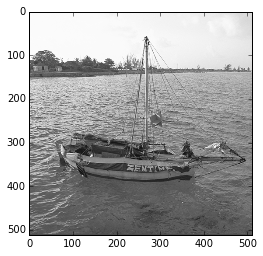

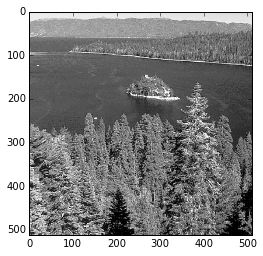

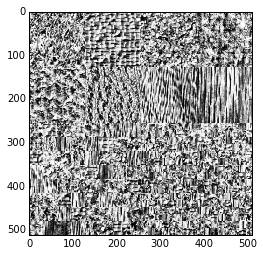

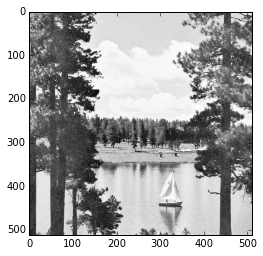

In [5]:
close_boat=np.asarray(Image.open("Images/Q3/81.pgm"),dtype=np.float64)/255.0
island=np.asarray(Image.open("Images/Q3/15.pgm"),dtype=np.float64)/255.0
texture=np.asarray(Image.open("Images/Q3/171.pgm"),dtype=np.float64)/255.0
far_boat=np.asarray(Image.open("Images/Q3/45.pgm"),dtype=np.float64)/255.0

plt.figure()
plt.imshow(close_boat, cmap="Greys_r")
plt.figure()
plt.imshow(island, cmap="Greys_r")
plt.figure()
plt.imshow(texture, cmap="Greys_r")
plt.figure()
plt.imshow(far_boat, cmap="Greys_r")

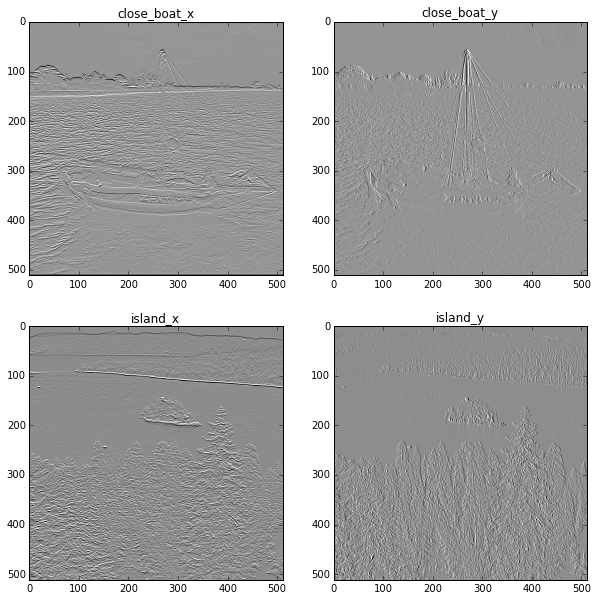

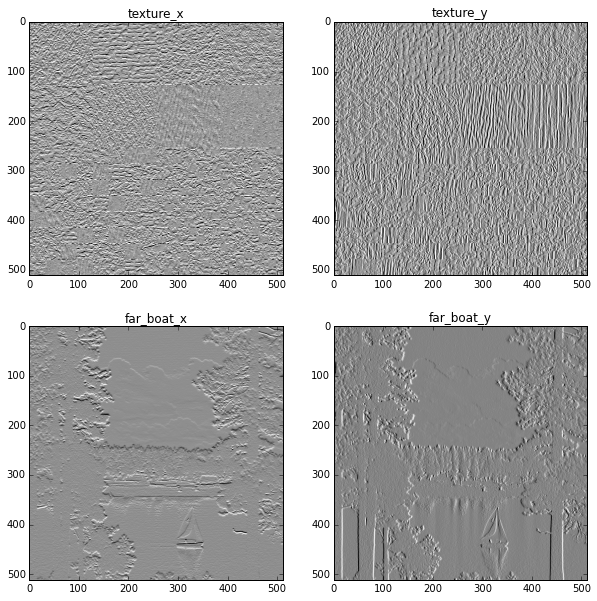

In [15]:
def apply_sobels(img):
    dx = ndimage.sobel(img, 0)  # horizontal derivative
    dy = ndimage.sobel(img, 1)  # vertical derivative
    return (dx,dy)

def show_all_sobels():
    close_boat=np.asarray(Image.open("Images/Q3/81.pgm"),dtype=np.float64)/255.0
    island=np.asarray(Image.open("Images/Q3/15.pgm"),dtype=np.float64)/255.0
    texture=np.asarray(Image.open("Images/Q3/171.pgm"),dtype=np.float64)/255.0
    far_boat=np.asarray(Image.open("Images/Q3/45.pgm"),dtype=np.float64)/255.0

    close_boat_x,close_boat_y=apply_sobels(close_boat)
    island_x,island_y =apply_sobels(island)
    texture_x,texture_y=apply_sobels(texture)
    far_boat_x,far_boat_y=apply_sobels(far_boat)
    
    the_plot=plt.figure()
    plt.title("Sobel filters I")
    the_plot.set_size_inches(10,10)

    temp_plot=plt.subplot(2,2,1)
    temp_plot.set_title("close_boat_x")
    plt.imshow(close_boat_x,cmap="Greys_r")

    temp_plot=plt.subplot(2,2,2)
    temp_plot.set_title("close_boat_y")
    plt.imshow(close_boat_y,cmap="Greys_r")

    temp_plot=plt.subplot(2,2,3)
    temp_plot.set_title("island_x")
    plt.imshow(island_x,cmap="Greys_r")

    temp_plot=plt.subplot(2,2,4)
    temp_plot.set_title("island_y")
    plt.imshow(island_y,cmap="Greys_r")
    
    the_plot=plt.figure()
    plt.title("Sobel filters II")
    the_plot.set_size_inches(10,10)

    temp_plot=plt.subplot(2,2,1) 
    temp_plot.set_title("texture_x")
    plt.imshow(texture_x,cmap="Greys_r")

    temp_plot=plt.subplot(2,2,2)
    temp_plot.set_title("texture_y")
    plt.imshow(texture_y,cmap="Greys_r")

    temp_plot=plt.subplot(2,2,3)
    temp_plot.set_title("far_boat_x")
    plt.imshow(far_boat_x,cmap="Greys_r")

    temp_plot=plt.subplot(2,2,4)
    temp_plot.set_title("far_boat_y")
    plt.imshow(far_boat_y,cmap="Greys_r") 
    
show_all_sobels()
    
    

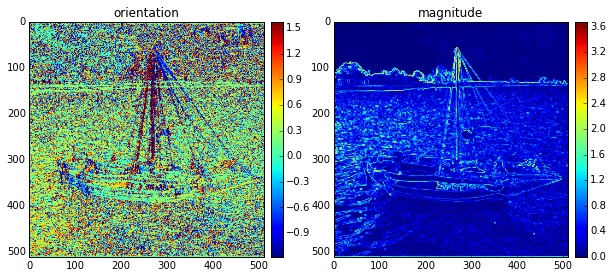

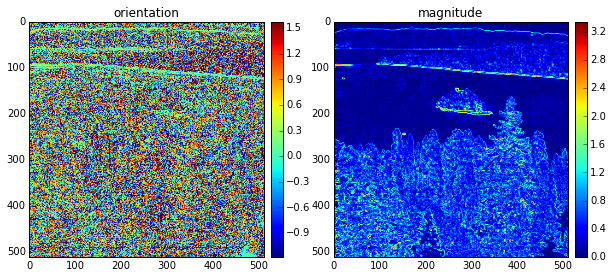

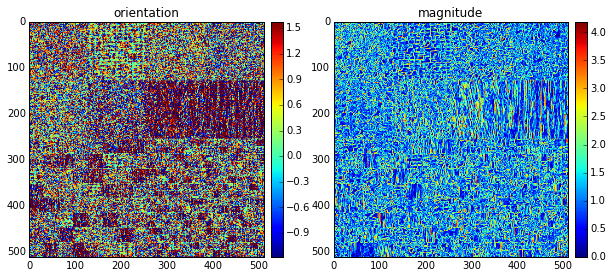

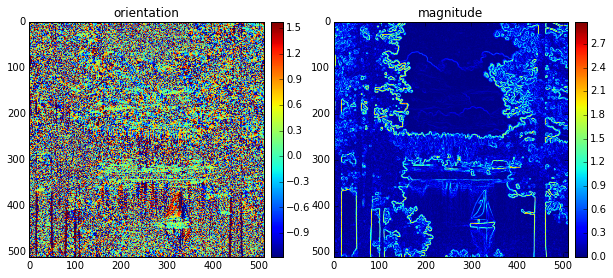

In [46]:
def calc_orientation(sobels):
    div=sobels[1]/sobels[0]
    return np.arctan(div)
    
def calc_mag(sobels):
    square_x=np.square(sobels[0])
    square_y=np.square(sobels[1])
    return np.sqrt(square_x+square_y)

def make_safe(sobels):
    x=sobels[0]
    x[x==0.0]=.0000001    
    return (x,sobels[1])

def discretize_theta(orr,num_vals=8.0):
    
    #numbers are from -pi/2 to pi/2
    shifted=orr+(np.pi/2.0)
    
    #numbers are from 0 to pi
    scaled=shifted*(num_vals/np.pi)
    
    #numbers are from 0 to 8
    #give things a little nudge to get them off zero
    scaled[scaled==0.0]=.0000001   
    
    #numbers are from 0 to 8 non-inclusive of 0
    ceiled=np.ceil(scaled)
    
    #numbers are one of [1,2,3,4,5,6,7,8]
    unscaled=ceiled*(np.pi/num_vals)
    
    #numbers are from -pi/2 to pi/2
    unshifted=unscaled-(np.pi/2.0)
    return unshifted
#     print((np.min(unshifted),np.max(unshifted)))
    
    
    
#returns[(img1_orr,img1_mag)...]
def calc_all_orr_mag(all_images,plot=True):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    to_return=[]
    for img in all_imgs:
        sobels=apply_sobels(img)
        sobels=make_safe(sobels)
        orientation=calc_orientation(sobels)
        discretized=discretize_theta(orientation)
        magnitude=calc_mag(sobels)

        if plot:
            the_figure=plt.figure()
            the_figure.set_size_inches(10,5)
            orr=plt.subplot(1,2,1)
            orr.set_title("orientation")
            le_plot=plt.imshow(discretized)
            divider = make_axes_locatable(plt.gca())
            cax = divider.append_axes("right", "5%", pad="3%")
            plt.colorbar(le_plot, cax=cax)
            
            
            mag=plt.subplot(1,2,2)
            mag.set_title("magnitude")
            le_plot=plt.imshow(magnitude)
            divider = make_axes_locatable(plt.gca())
            cax = divider.append_axes("right", "5%", pad="3%")
            plt.colorbar(le_plot, cax=cax)
        to_return.append((discretized,magnitude))
    return to_return
            
all_images=[close_boat,island,texture,far_boat]
orr_mags=calc_all_orr_mag(all_images)

In [64]:
#ok kinda crazy, since you can't return something complicated 
#from the function given to generic filter, I accumulate the actual
#values into a global variable.
def histogramify(data,bins,hist_vals):
    histogram=np.histogram(data)
    hist_vals.append(histogram[0])
    return 0

def gen_descriptors(orr_mags):
    hist_vals=[]
    bins=np.unique(orr_mags[0][0])
    checksums=ndimage.filters.generic_filter(orr_mags[0][0],lambda x:histogramify(x,bins,hist_vals),(11,11))
    hist_vals=np.array(hist_vals)
    print(hist_vals)
#print(np.unique(checksums))
gen_descriptors(orr_mags)

[[ 2  0  0 ..., 16  0  4]
 [ 2  0  1 ..., 19  0  4]
 [ 1  0  1 ..., 19  0  4]
 ..., 
 [ 6  2  0 ..., 10  7  8]
 [ 6  4  0 ...,  9  6  8]
 [ 8  4  0 ..., 10  4  8]]
